# Experiment : 06
## Digit classification using pre-trained networks like VGGnet-19 for MNIST dataset and analyse and visualize performance improvement.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Original X_train shape: (60000, 28, 28)
Processed X_train[0] shape: (32, 32, 3)
80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 21ms/step - accuracy: 0.8141 - loss: 0.6672 - val_accuracy: 0.9522 - val_loss: 0.1642
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.9519 - loss: 0.1555 - val_accuracy: 0.9622 - val_loss: 0.1220
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.9610 - loss: 0.1228 - val_accuracy: 0.9655 - val_loss: 0.1092
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.9667 - loss: 0.1039 - val_accuracy: 0.9633 - val_loss: 0.1139
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.9664 - loss: 0.1000 - val_accuracy: 0.9687 - val_loss: 0.0983


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 1, 1, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,426,080 (77.92 MB)

 Trainable params: 133,898 (523.04 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

 Optimizer params: 267,798 (1.02 MB)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9675 - loss: 0.1043
Test Accuracy: 0.9705


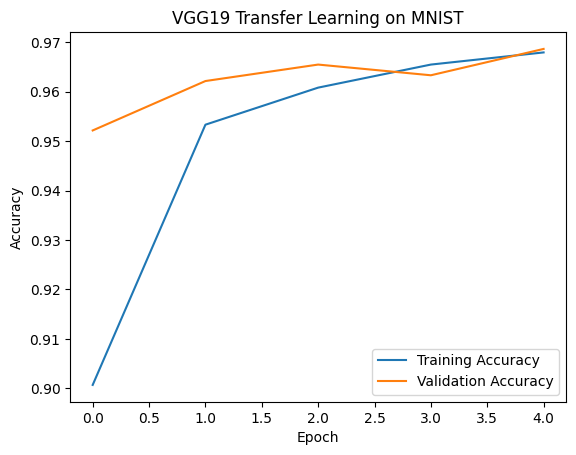

In [1]:
# ----------------------------- Import Libraries -----------------------------
import tensorflow as tf
import numpy as np
from keras.datasets import mnist
from keras.applications import VGG19
from keras import layers, models
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# ----------------------------- Load and Explore Dataset -----------------------------
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(f'Original X_train shape: {X_train.shape}')  # (60000, 28, 28)

# ----------------------------- Resize and Preprocess Images -----------------------------
# Resize to 32x32 and convert grayscale (1 channel) to RGB (3 channels)
X_train = np.repeat(tf.image.resize(X_train[..., np.newaxis], (32, 32)).numpy(), 3, axis=-1)
X_test = np.repeat(tf.image.resize(X_test[..., np.newaxis], (32, 32)).numpy(), 3, axis=-1)
print(f'Processed X_train[0] shape: {X_train[0].shape}')  # (32, 32, 3)

# Normalize pixel values to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# ----------------------------- One-Hot Encode Labels -----------------------------
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# ----------------------------- Load Pre-trained VGG19 Model -----------------------------
base_model = VGG19(
    include_top=False,         # Exclude final classification layers
    weights='imagenet',        # Use pre-trained ImageNet weights
    input_shape=(32, 32, 3)    # Input shape compatible with resized MNIST
)
base_model.trainable = False   # Freeze base model layers

# ----------------------------- Build the Full Model -----------------------------
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer for 10 digit classes
])

# ----------------------------- Compile the Model -----------------------------
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# ----------------------------- Train the Model -----------------------------
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2
)

# ----------------------------- Model Summary -----------------------------
model.summary()

# ----------------------------- Evaluate on Test Data -----------------------------
score = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {score[1]:.4f}')

# ----------------------------- Plot Training History -----------------------------
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('VGG19 Transfer Learning on MNIST')
plt.legend();
